# Generating datasets

In this section, we cover generation of data sets.

In [1]:
using CairoMakie
using AlgebraOfGraphics
using Random
using Distributions
using Chain
using DataFrames
using StatsFuns

## Classical linear model

Parameters.

In [2]:
n = 100
β₀ = 1
β₁ = 2
σ² = 10

10

Simulation.

In [3]:
x = rand(Normal(10, 3), n)
y = β₀ .+ β₁* x + rand(Normal(0, sqrt(σ²)), n)

100-element Vector{Float64}:
 14.101792441812098
 17.00875561983592
 21.404811166149056
 13.723812226026947
 18.23715076185071
 25.312055903242303
 26.698519591088363
 27.08962181070109
 13.9506971681766
 22.10165182418819
  ⋮
 12.696008550583175
 29.70605944330483
 19.624420048006073
  2.314573791002285
 24.320592230813453
 19.343868480154335
 27.726244991112882
 15.208245642231745
 11.572715784131324

Visualization.

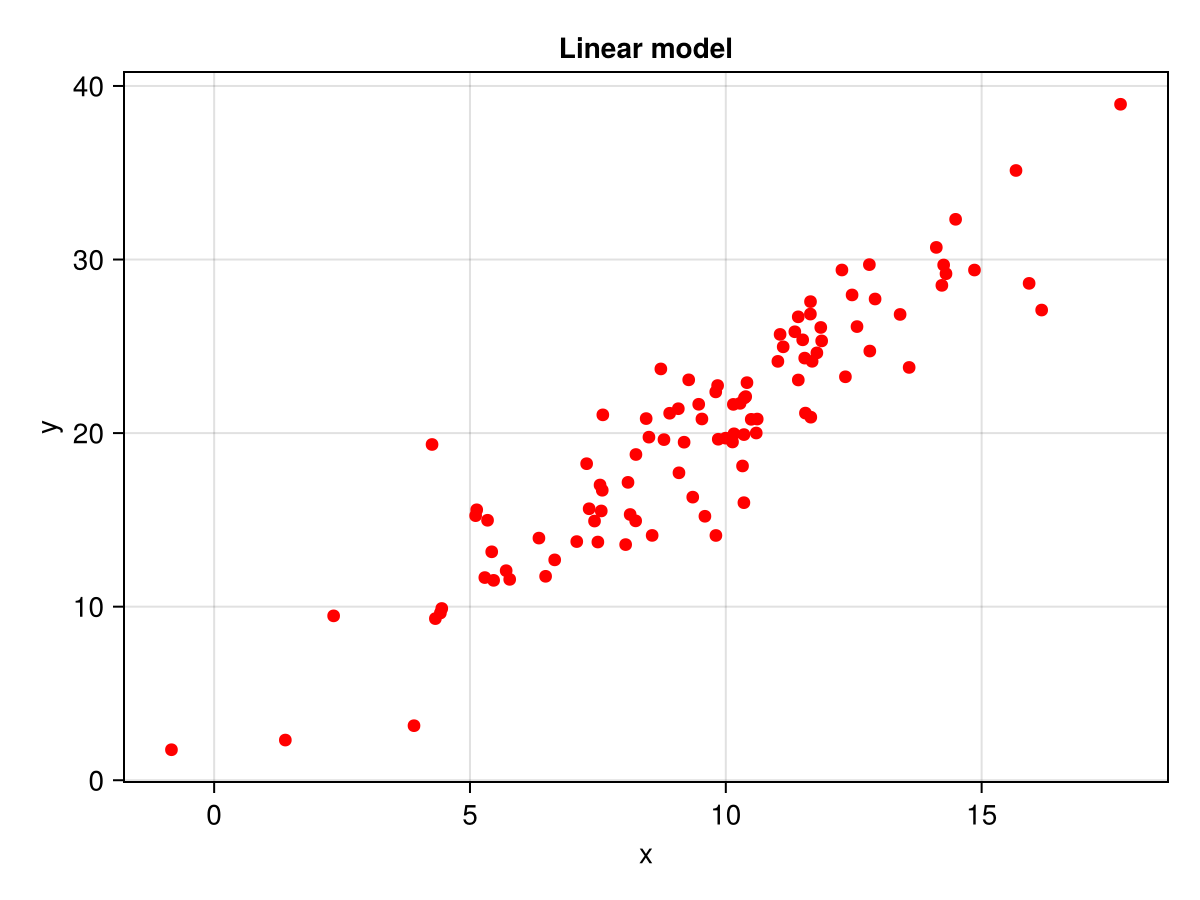

In [4]:
fig = scatter(x, y, color = :red,
    axis = (title = "Linear model", xlabel = "x", ylabel = "y")
)

## Linear model (GLM)

Parameters.

In [5]:
n = 100
β₀ = 10
β₁ = 3
β₂ = 2
σ² = 10

10

Simulation.

In [6]:
x1 = rand(Normal(), n)
x2 = rand(Exponential(), n)
μ = β₀ .+ β₁ * x1 + β₂ * x2
y = rand.(Normal.(μ, sqrt(σ²)))
df = DataFrame(x1 = x1, x2 = x2, μ = μ, y = y)

100×4 DataFrame
 Row │ x1         x2          μ         y          
     │ Float64    Float64     Float64   Float64    
─────┼─────────────────────────────────────────────
   1 │ -0.456225  0.398147     9.42762  -0.35631
   2 │ -0.211222  0.00143155   9.3692    5.03827
   3 │ -0.522661  2.46782     13.3677   11.9722
   4 │ -1.08844   0.86189      8.45847   8.77415
   5 │ -2.03483   0.98325      5.86202   5.9
   6 │  0.118367  1.26789     12.8909   13.5361
   7 │ -1.35614   1.11774      8.16704  14.1111
   8 │ -1.93759   0.231052     4.64933   3.65316
  ⋮  │     ⋮          ⋮          ⋮          ⋮
  94 │ -0.300003  0.787314    10.6746    6.81557
  95 │  0.312486  0.621605    12.1807   10.9036
  96 │ -0.258915  1.40794     12.0391   14.2323
  97 │  0.487575  0.656793    12.7763    9.91109
  98 │  1.37922   0.535521    15.2087    9.22651
  99 │  0.160942  1.3727      13.2282    9.38236
 100 │ -2.78701   0.275535     2.19004  -0.0919636
                                    85 rows omitted

Visualization.

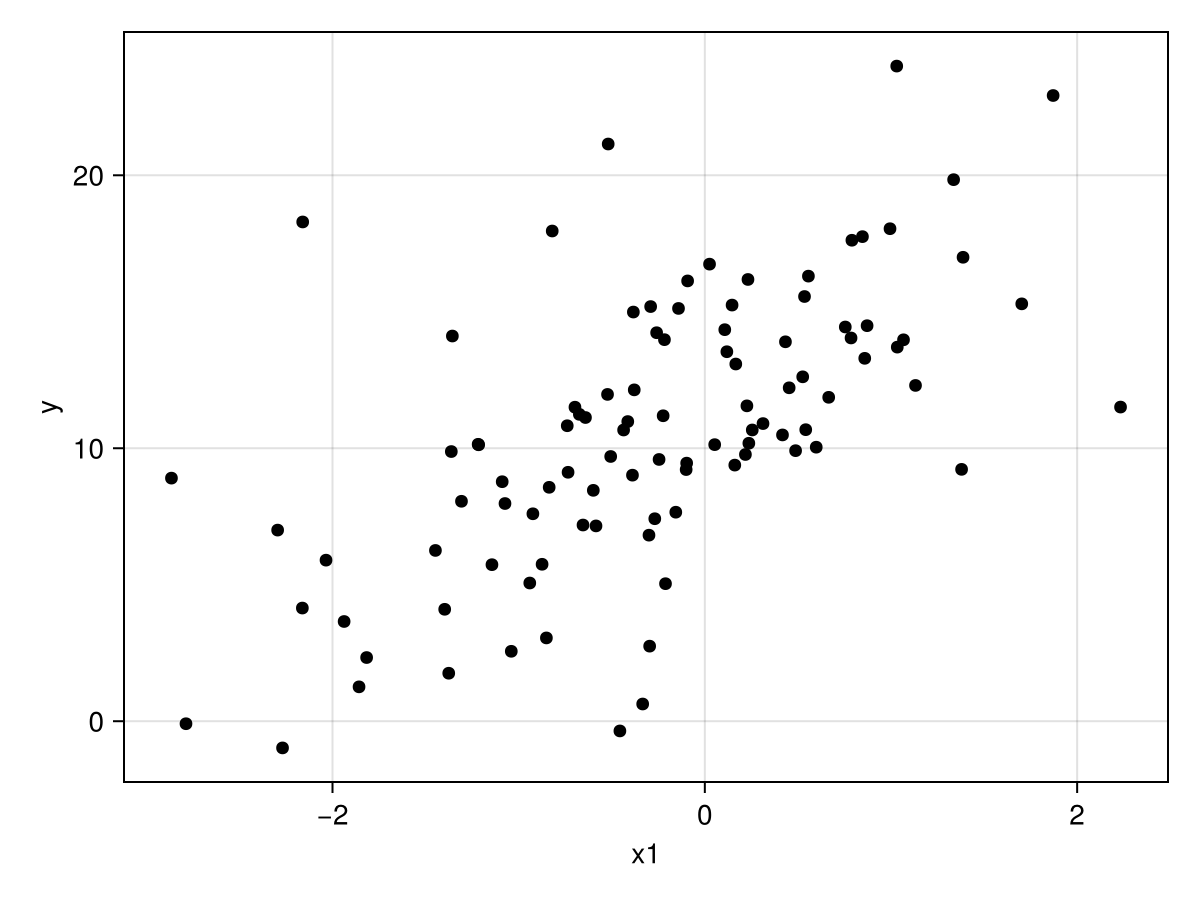

In [7]:
g = data(df) * mapping(:x1, :y)
fig = draw(g)

Let's plot more variables.

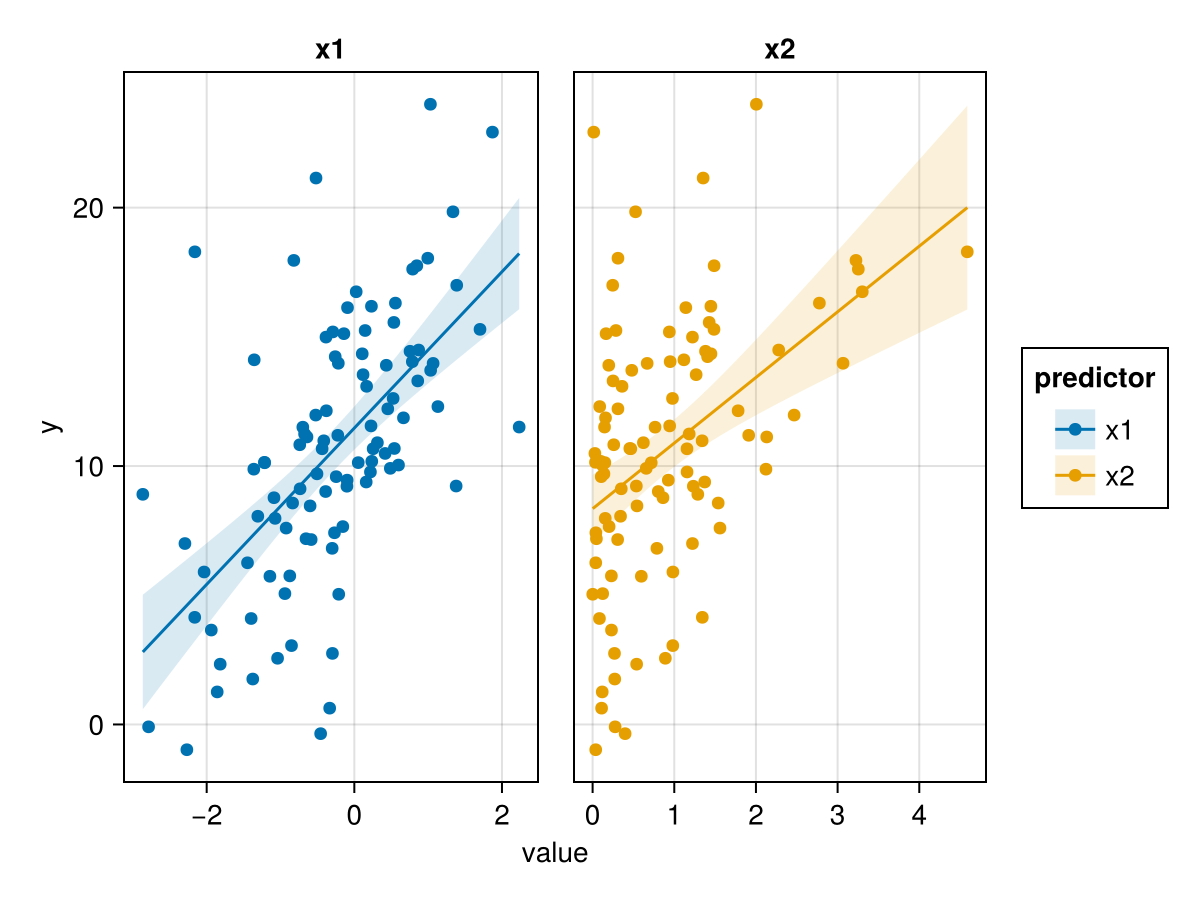

In [8]:
dfl = stack(df, [:x1, :x2], variable_name = :predictor)
layers = mapping() + linear()
g = data(dfl) * layers *  mapping(:value, :y, col = :predictor, color = :predictor)
fig = draw(g, facet = (; linkxaxes = :none))

## Bernoulli model

Define parameters.

In [9]:
n = 100
β₀ = 1
β₁ = 3

3

Simulate.

In [10]:
x = rand(Normal(), n)
p = logistic.(β₀ .+ β₁ * x)
y = rand.(Bernoulli.(p))
df = DataFrame(x = x, p = p, y = y)

100×3 DataFrame
 Row │ x           p          y     
     │ Float64     Float64    Bool  
─────┼──────────────────────────────
   1 │ -0.555357   0.339377   false
   2 │ -0.240559   0.569135   false
   3 │  0.710664   0.958193    true
   4 │  0.504494   0.925082    true
   5 │  1.01373    0.982727    true
   6 │ -1.61006    0.0212447  false
   7 │  0.320352   0.876647    true
   8 │  0.148535   0.809321    true
  ⋮  │     ⋮           ⋮        ⋮
  94 │  0.150219   0.810099    true
  95 │  0.631868   0.947629    true
  96 │ -0.749619   0.222898   false
  97 │ -0.41258    0.440844    true
  98 │ -0.966919   0.130023   false
  99 │ -0.0580121  0.695501    true
 100 │  0.595001   0.94186     true
                     85 rows omitted

Visualize.

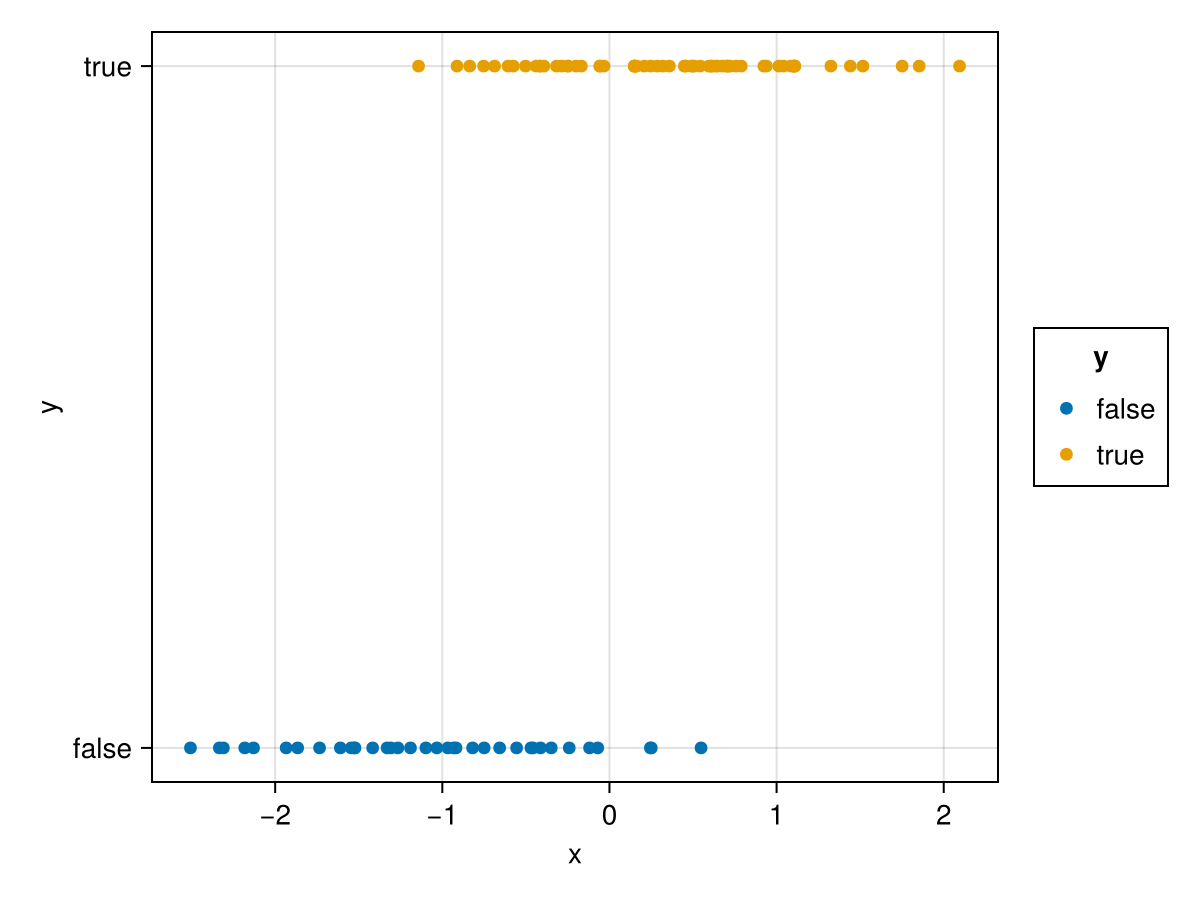

In [11]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Poisson model

Define parameters.

In [12]:
n = 100
β₀ = 0.1
β₁ = 0.5

0.5

Simulate.

In [13]:
x = rand(Normal(), n)
lambda = exp.(β₀ .+ β₁ * x)
y = rand.(Poisson.(lambda))
df = DataFrame(x = x, lambda = lambda, y = y)

100×3 DataFrame
 Row │ x            lambda    y     
     │ Float64      Float64   Int64 
─────┼──────────────────────────────
   1 │ -1.18761     0.610301      2
   2 │  0.887152    1.72215       2
   3 │  2.01886     3.03262       3
   4 │ -3.18503     0.224806      0
   5 │  1.19287     2.00658       0
   6 │ -0.00391458  1.10301       1
   7 │ -1.0093      0.667209      0
   8 │  0.104658    1.16454       1
  ⋮  │      ⋮          ⋮        ⋮
  94 │  0.423329    1.3657        0
  95 │  1.40663     2.23293       2
  96 │  0.120339    1.17371       2
  97 │  0.757547    1.61409       4
  98 │ -1.36898     0.55739       0
  99 │ -0.428804    0.891899      0
 100 │ -0.087757    1.05773       0
                     85 rows omitted

Visualize.

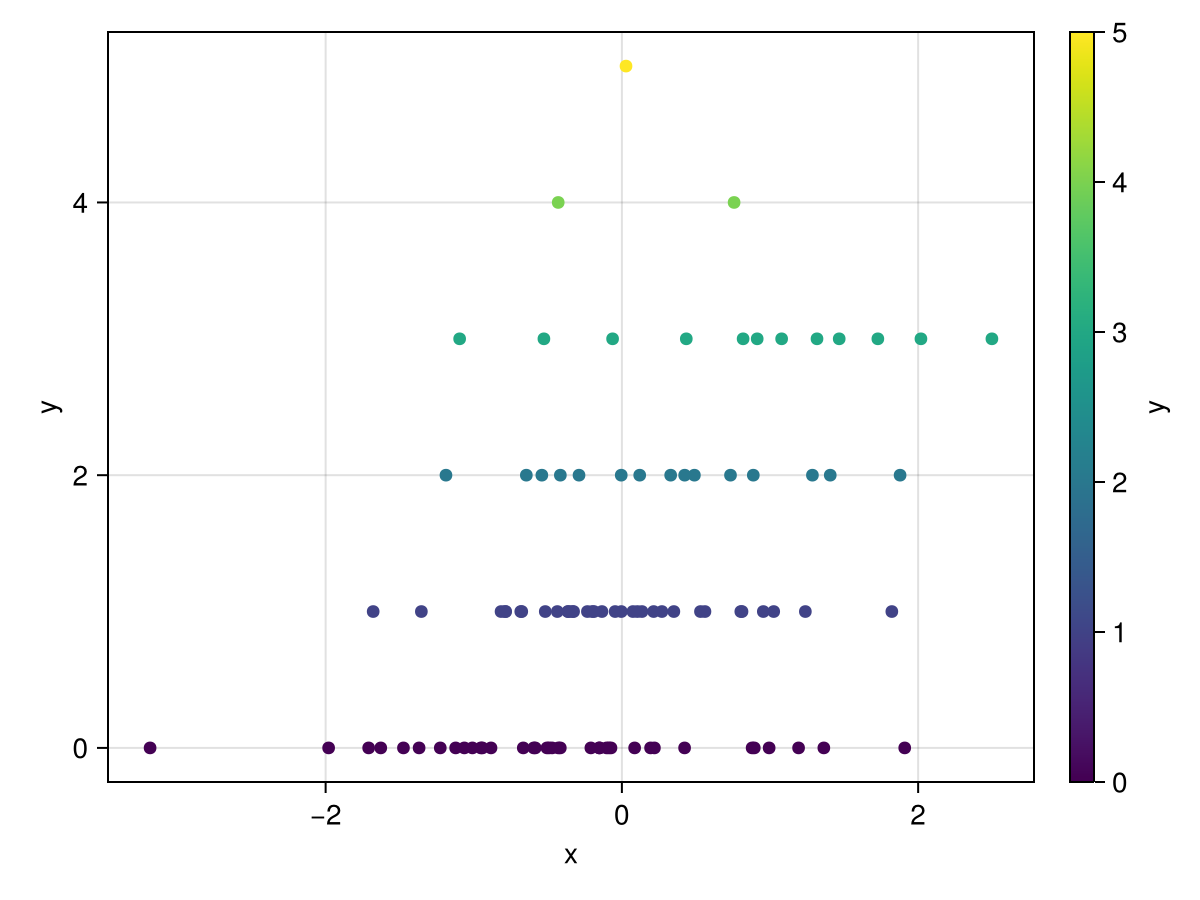

In [14]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Linear model with dataframes (GLM)

Define parameters.

In [15]:
n = 100
β₀ = 10
β₁ = 3
σ² = 10

10

Simulate.

In [16]:
generate_y(x1, x2) = β₀ .+ β₁ * x1 + 2 * x2
df = @chain begin
    DataFrame(x1 = rand(Normal(), n), x2 = rand(Exponential(), n))
    transform!([:x1, :x2] => generate_y => :μ)
    transform!(:μ => (x -> rand.(Normal.(x, sqrt(σ²)))) => :y)
end

100×4 DataFrame
 Row │ x1          x2        μ         y         
     │ Float64     Float64   Float64   Float64   
─────┼───────────────────────────────────────────
   1 │  0.271624   1.4446    13.7041   12.2022
   2 │  1.58854    0.320927  15.4075   11.291
   3 │  0.0165223  0.345861  10.7413    9.57639
   4 │  1.0571     0.654935  14.4812   16.4826
   5 │  0.37455    0.525137  12.1739   12.4724
   6 │ -0.817567   2.64979   12.8469   16.4756
   7 │  0.330421   0.767763  12.5268   10.8683
   8 │ -0.312307   0.780778  10.6246   11.275
  ⋮  │     ⋮          ⋮         ⋮          ⋮
  94 │  0.942884   0.903447  14.6355   12.6638
  95 │  0.374486   2.33609   15.7956   18.2783
  96 │ -0.301699   0.420486   9.93587   6.28636
  97 │ -1.027      1.27081    9.46062   9.22727
  98 │ -0.274045   0.938657  11.0552   12.0176
  99 │ -2.53244    0.864466   4.13162  -0.596149
 100 │  2.04648    1.03057   18.2006   16.6966
                                  85 rows omitted

Visualize.

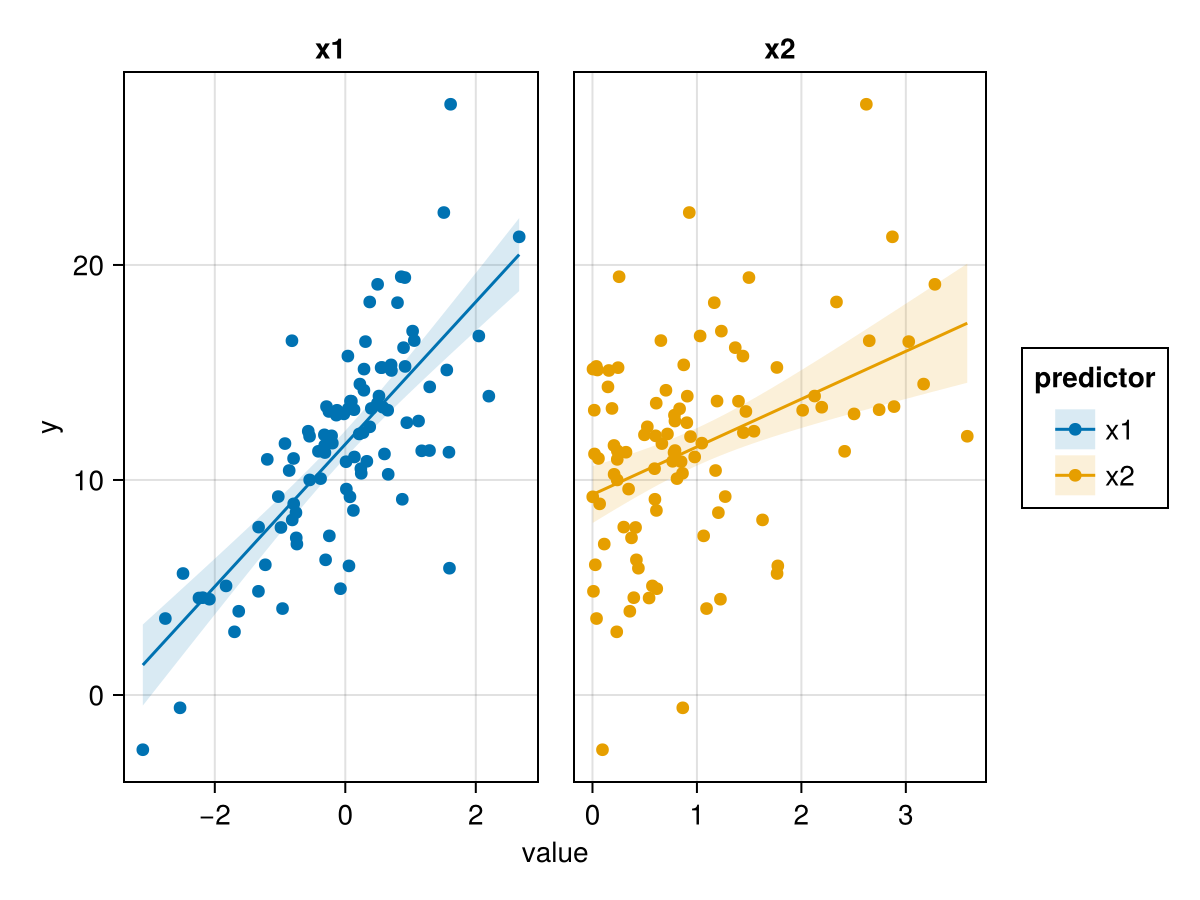

In [17]:
dfl = stack(df, [:x1, :x2], variable_name = :predictor)
layers = mapping() + linear()
g = data(dfl) * layers *  mapping(:value, :y, col = :predictor, color = :predictor)
fig = draw(g, facet = (; linkxaxes = :none))

## Bernoulli model with dataframes

Define parameters.

In [18]:
n = 100
β₀ = 1
β₁ = 3

3

Simulate.

In [19]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> logistic.(β₀ .+ β₁ * x)) => :p)
    transform!(:p => (x -> rand.(Bernoulli.(x))) => :y)
end

100×3 DataFrame
 Row │ x           p           y     
     │ Float64     Float64     Bool  
─────┼───────────────────────────────
   1 │ -2.14053    0.00440069  false
   2 │  2.628      0.999861     true
   3 │  0.0522766  0.760756     true
   4 │ -1.78045    0.0128517   false
   5 │  0.513612   0.926956    false
   6 │  0.27942    0.862743     true
   7 │ -0.517397   0.365356    false
   8 │ -0.416184   0.43818      true
  ⋮  │     ⋮           ⋮         ⋮
  94 │  0.469506   0.917475     true
  95 │ -1.54663    0.0255835   false
  96 │  0.550768   0.934153     true
  97 │ -1.33673    0.0469682   false
  98 │ -0.105638   0.664427    false
  99 │ -0.866831   0.167913    false
 100 │ -0.0483702  0.701592     true
                      85 rows omitted

Visualize.

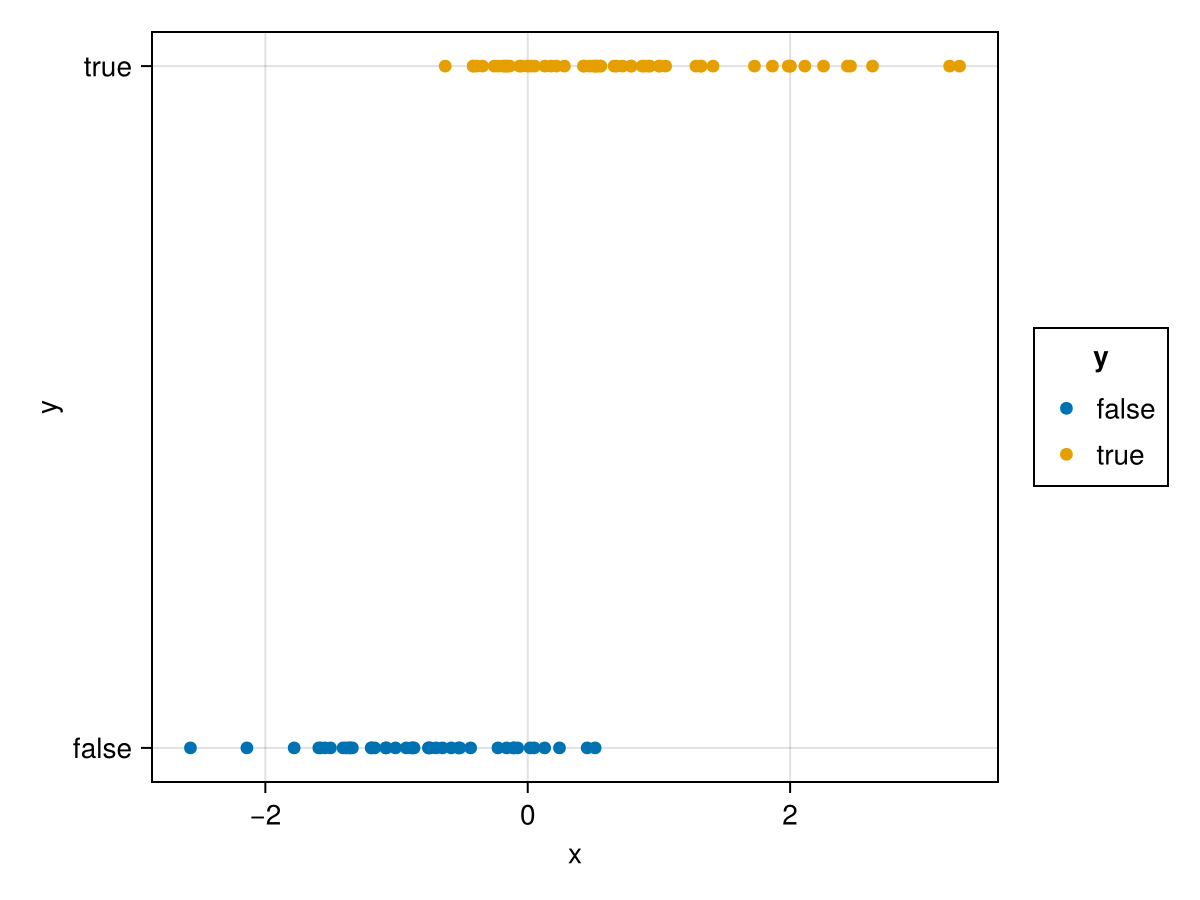

In [20]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Poisson model with dataframes

Define parameters.

In [21]:
n = 100
β₀ = 0.1
β₁ = 0.5

0.5

Simulate.

In [22]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> exp.(0.1 .+ 0.5 * x)) => :λ)
    transform!(:λ => (x -> rand.(Poisson.(x))) => :y)
end

100×3 DataFrame
 Row │ x           λ         y     
     │ Float64     Float64   Int64 
─────┼─────────────────────────────
   1 │ -1.57808    0.502057      1
   2 │  0.887769   1.72269       2
   3 │  1.17869    1.99241       3
   4 │ -0.422511   0.89471       0
   5 │  2.41703    3.70067       3
   6 │ -1.00519    0.668584      0
   7 │  0.493387   1.41438       1
   8 │  1.53144    2.37672       4
  ⋮  │     ⋮          ⋮        ⋮
  94 │ -1.20097    0.606235      1
  95 │ -0.203454   0.998274      1
  96 │ -0.773461   0.750714      0
  97 │ -0.107869   1.04714       1
  98 │  0.577667   1.47526       0
  99 │  0.0571309  1.1372        1
 100 │ -0.188331   1.00585       0
                    85 rows omitted

Visualize.

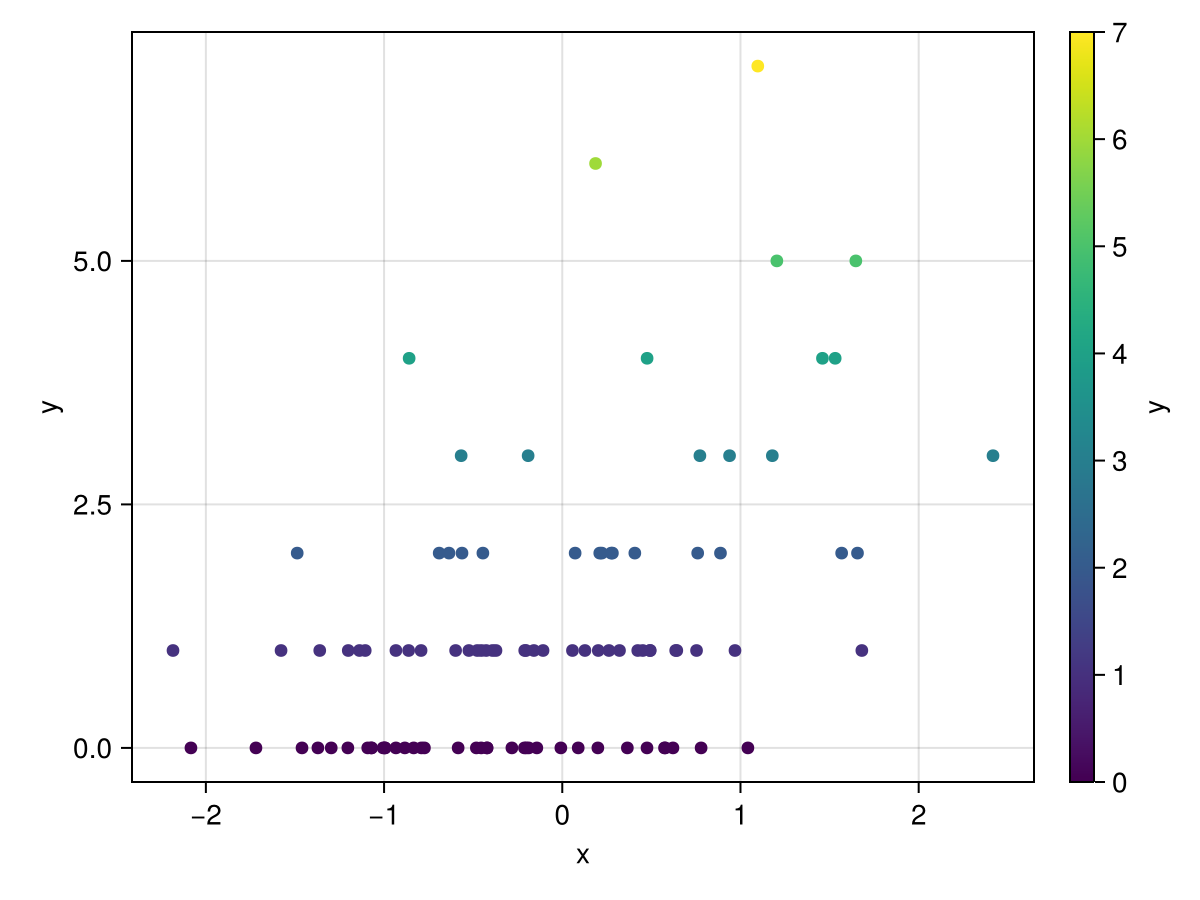

In [23]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*